<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Reducci%C3%B3n_de_dimensionalidad_PCA_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA 2 (Core)**
**Visualización de Datos con Componentes Principales**

**Descripción:**

En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «Iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

Enlace al dataset: https://www.kaggle.com/uciml/iris

**Objetivo:**

El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.

**Instrucciones:**

1. Carga de datos:

  – Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.

  – Asegúrate de que los datos no contengan valores nulos o atípicos.

2. Exploración y preprocesamiento de datos:

  – Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.

  – Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

3. Aplicación de PCA:

  – Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.

  – Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

4. Visualización de los componentes principales:

  – Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.

  – Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

5. Interpretación de los resultados:

  – Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.

  – Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

**Análisis de Resultados:**

  – Compara la distribución de las clases en el espacio bidimensional con la distribución original de las variables. ¿Qué tan bien puede PCA capturar las relaciones entre las clases en este caso?

  – Realiza un reporte que incluya el gráfico de los componentes principales y discute la utilidad de PCA para la visualización de datos en problemas de clasificación.

**Conclusión:**

  – Esta actividad se centra en la visualización de datos utilizando PCA. La reducción de dimensionalidad mediante PCA no solo ayuda a visualizar los datos en un espacio más pequeño, sino que también permite identificar las relaciones entre las variables y las clases.

Valores nulos en el dataset:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


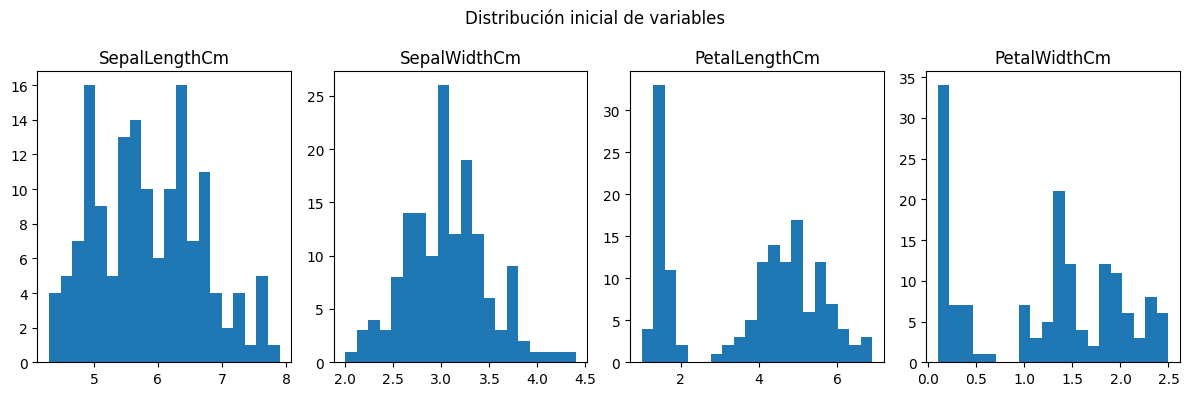


Varianza explicada por los componentes principales:
Primer componente: 72.77%
Segundo componente: 23.03%
Total varianza explicada: 95.80%


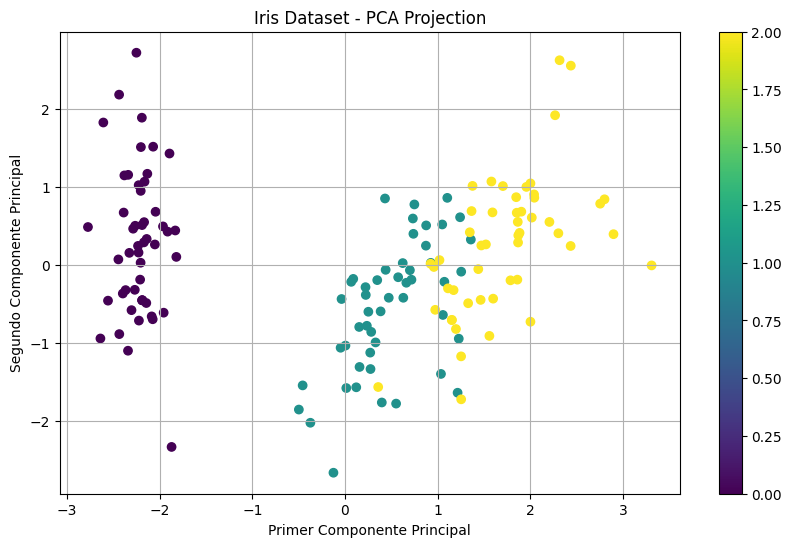


Coeficientes de los componentes principales:

Componente Principal 1:
Sepal Length: 0.5224
Sepal Width: -0.2634
Petal Length: 0.5813
Petal Width: 0.5656

Componente Principal 2:
Sepal Length: 0.3723
Sepal Width: 0.9256
Petal Length: 0.0211
Petal Width: 0.0654


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Paso 1: Carga de datos
# Cargar el dataset desde la ruta especificada
URL = '/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/Iris/Iris.csv'
iris = pd.read_csv(URL)
df = iris.drop(columns=['Id'])
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species'] = df['Species'].map(species_mapping)

# Verificar si hay valores nulos
print("Valores nulos en el dataset:")
print(df.isnull().sum())

# 2. Exploración y preprocesamiento
# Separar características y target
X = df.iloc[:, :-1]
y = df['Species']

# Normalización usando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualización de distribución inicial
plt.figure(figsize=(12, 4))
plt.suptitle('Distribución inicial de variables')
for i, column in enumerate(X.columns, 1):
    plt.subplot(1, 4, i)
    plt.hist(X[column], bins=20)
    plt.title(column)
plt.tight_layout()
plt.show()

# 3. Aplicación de PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
print("\nVarianza explicada por los componentes principales:")
print(f"Primer componente: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Segundo componente: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total varianza explicada: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# 4. Visualización de componentes principales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Iris Dataset - PCA Projection')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.colorbar(scatter)
plt.grid(True)
plt.show()

# 5. Interpretación de componentes principales
print("\nCoeficientes de los componentes principales:")
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
for i, comp in enumerate(pca.components_[:2], 1):
    print(f"\nComponente Principal {i}:")
    for name, coef in zip(feature_names, comp):
        print(f"{name}: {coef:.4f}")

# **¿El PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos?**

Sí, el Análisis de Componentes Principales (PCA) es muy útil para separar correctamente las clases en un conjunto de datos. Al reducir la dimensionalidad, el PCA identifica las direcciones (componentes principales) en las que los datos varían más. Esto ayuda a visualizar y entender mejor las diferencias entre las clases.

En la gráfica del conjunto de datos de Iris con PCA, vemos cómo las tres clases de flores se agrupan claramente en diferentes regiones del espacio de los dos primeros componentes principales. Esta separación sugiere que los componentes principales capturan la mayor parte de la varianza que diferencia a las clases.

**Cómo mejora la comprensión de los datos:**

* **Reducción de Dimensionalidad:** Simplifica los datos al mantener solo las características más importantes, lo cual facilita su análisis.

* **Visualización:** Permite visualizar datos complejos en 2D o 3D, revelando patrones y relaciones que no eran evidentes en las dimensiones originales.

* **Ruido:** Elimina el ruido y las características irrelevantes, mejorando así la calidad del análisis.

* **Eficiencia Computacional:** Reduce el coste computacional al trabajar con menos variables, lo que es útil en análisis de grandes volúmenes de datos.